In [1]:
%%capture
! pip install git+https://github.com/huggingface/huggingface_hub.git@main
! sudo apt -qq install git-lfs
! git config --global credential.helper store

## Make sure you're logged in to Hugging Face CLI

In [2]:
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


# Simple Example

### Sequential API

In [3]:
import tensorflow as tf
from huggingface_hub import push_to_hub_keras

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, activation="relu"))
model.compile(optimizer="adam", loss="mse")

# Your model must be built in order to push it!
model.build((None, 2))

push_to_hub_keras(model, 'keras-dummy-sequential-demo')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


keras_metadata.pb:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

fingerprint.pb:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

saved_model.pb:   0%|          | 0.00/31.9k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/eagle0504/keras-dummy-sequential-demo/commit/88c4be46b22fb9fe41beb33676dba80b7469d61c', commit_message='Push Keras model using huggingface_hub.', commit_description='', oid='88c4be46b22fb9fe41beb33676dba80b7469d61c', pr_url=None, pr_revision=None, pr_num=None)

In [4]:
from huggingface_hub import from_pretrained_keras

# Replace nateraw with your username that you logged in with!
m = from_pretrained_keras('nateraw/keras-dummy-sequential-demo')

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/611 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

model.png:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

variables/variables.index:   0%|          | 0.00/391 [00:00<?, ?B/s]

variables/variables.data-00000-of-00001:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/3.37k [00:00<?, ?B/s]

In [5]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Functional API

In [6]:
inputs = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(2, activation="relu")(inputs)
model = tf.keras.models.Model(inputs=inputs, outputs=x)
model.compile(optimizer="adam", loss="mse")

# No need to build with functional, as the Input layer has already defined the graph
push_to_hub_keras(model, 'keras-dummy-functional-demo')

fingerprint.pb:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

saved_model.pb:   0%|          | 0.00/31.8k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/4.47k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/eagle0504/keras-dummy-functional-demo/commit/fae8e27e047b91ad4cbcb0f21a77ece7df34cdf1', commit_message='Push Keras model using huggingface_hub.', commit_description='', oid='fae8e27e047b91ad4cbcb0f21a77ece7df34cdf1', pr_url=None, pr_revision=None, pr_num=None)

### Keras Mixin

In [8]:
from huggingface_hub import KerasModelHubMixin


class DummyModel(tf.keras.Model, KerasModelHubMixin):
    def __init__(self, **kwargs):
        super().__init__()
        self.config = kwargs.pop("config", None)
        self.l1 = tf.keras.layers.Dense(2, activation="relu")
        dummy_batch_size = input_dim = 2
        self.dummy_inputs = tf.ones([dummy_batch_size, input_dim])

    def call(self, x):
        return self.l1(x)

model = DummyModel()

# Your model must be built!
# Here we use dummy inputs defined in the model itself, a recommended best practice taken from keras docs
model(model.dummy_inputs)

model.push_to_hub('keras-dummy-model-mixin-demo')

fingerprint.pb:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

saved_model.pb:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/eagle0504/keras-dummy-model-mixin-demo/commit/187df642c34ab41467051c4802fc642ca0ef9245', commit_message='Push model using huggingface_hub.', commit_description='', oid='187df642c34ab41467051c4802fc642ca0ef9245', pr_url=None, pr_revision=None, pr_num=None)

# Complete Example

This is a more complete example of training a denoising autoencoder (taken from [keras-io/examples](https://github.com/keras-team/keras-io/blob/master/examples/vision/autoencoder.py))

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [10]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

## Prepare the data

11490434/11490434 [==============================] - 0s 0us/step


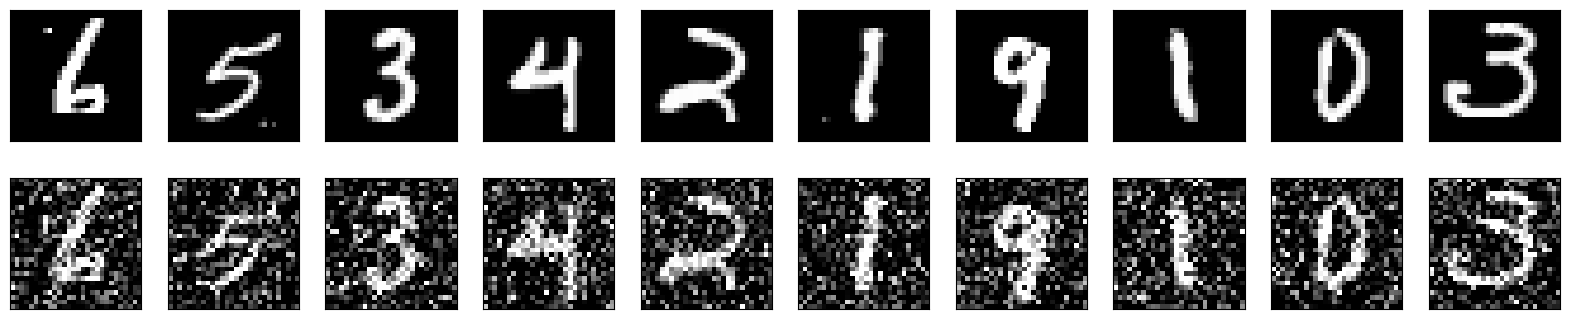

In [11]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

## Build the Autoencoder

We are going to use the Functional API to build our convolutional autoencoder.

In [12]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)        9248

## Train the Autoencoder on Noisy Data

We want our autoencoder to learn how to denoise the images.

In [13]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/10
469/469 [==============================] - 13s 15ms/step - loss: 0.1727 - val_loss: 0.1052
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1012 - val_loss: 0.0971
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0963 - val_loss: 0.0940
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0940 - val_loss: 0.0923
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0925 - val_loss: 0.0912
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0914 - val_loss: 0.0904
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0905 - val_loss: 0.0895
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0899 - val_loss: 0.0896
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0893 - val_loss: 0.0885
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0889 - val_loss: 0

## Make Predictions

Let's now predict on the noisy data and display the results of our autoencoder.
Notice how the autoencoder does an amazing job at removing the noise from the
input images.

313/313 [==============================] - 1s 2ms/step


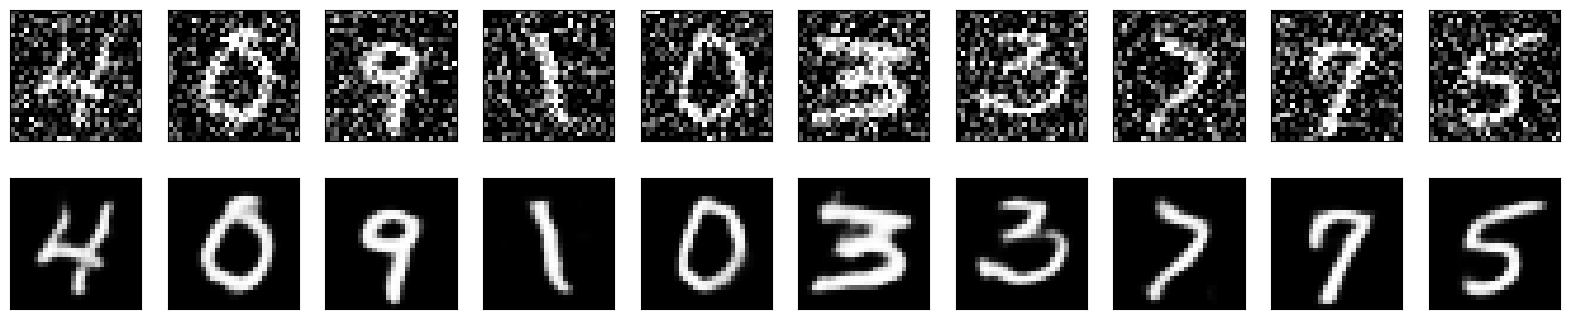

In [14]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

## Push Autoencoder to Hugging Face Hub

In [15]:
from huggingface_hub import push_to_hub_keras

push_to_hub_keras(autoencoder, "autoencoder-keras-mnist-demo")

fingerprint.pb:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

keras_metadata.pb:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/120k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/eagle0504/autoencoder-keras-mnist-demo/commit/381a8d2d030c46530b43df88baf2f6d1a11d1ce5', commit_message='Push Keras model using huggingface_hub.', commit_description='', oid='381a8d2d030c46530b43df88baf2f6d1a11d1ce5', pr_url=None, pr_revision=None, pr_num=None)

## Reload from hub and make predictions!

In [16]:
%%time

from huggingface_hub import from_pretrained_keras

reloaded_model = from_pretrained_keras('eagle0504/autoencoder-keras-mnist-demo')

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/840 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

variables/variables.index:   0%|          | 0.00/905 [00:00<?, ?B/s]

model.png:   0%|          | 0.00/27.5k [00:00<?, ?B/s]

fingerprint.pb:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

variables/variables.data-00000-of-00001:   0%|          | 0.00/120k [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/120k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

CPU times: user 1.5 s, sys: 67.8 ms, total: 1.57 s
Wall time: 2.73 s


313/313 [==============================] - 2s 5ms/step


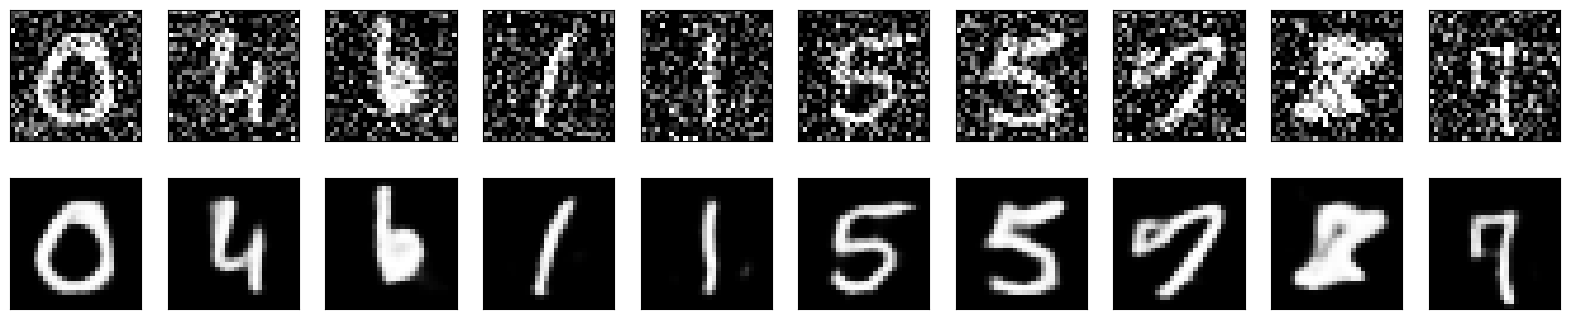

In [17]:
predictions = reloaded_model.predict(noisy_test_data)
display(noisy_test_data, predictions)